Task 4 – Empirical Analysis of ETFs 

• Choose a sector ETF definitly XLRE 

• Find its 30 largest holdings.

• Collect ~6 months of price data but i'll go with 12 months 

• Compute daily returns. 

• Compute covariance matrix.

• Run PCA. 

• Run SVD. 

• Write a 500+ word analysis explaining

[

• Why returns matter. 

• How PCA vs. SVD differ. 

• What eigenvectors, eigenvalues, and singular values tell you about your ETF. 

• Interpret results in finance terms, not just math. Report Writing Rules ]


• Two types of reports required in your submission [

• Technical report → focused on methods, parameters, and numbers. 

• Non-technical report → focused on financial meaning, decisions, and implications (no jargon). 

• Graphs must be labeled (axes, scales, titles). 

• No grammar errors, organized, and professional. 

• References and in-text citations are mandatory (can’t just dump a reference list).]

In [9]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from datetime import datetime, timedelta

Setting up the essential libraries, yfinance to pull XLRE data, pandas/numpy for wrangling and math, matplotlib for plots, and PCA for factor analysis. We want to fetch ETF prices, compute returns, and analyze their risk structure.

In [8]:
# Set time period
start = datetime(2024, 1, 2)
end = datetime(2025, 1, 2)

# Downloading adjusted close prices for 30 stocks
tickers = [
    "AMT", "PLD", "WELL", "EQIX", "SPG", "O", "DLR", "PSA", "CBRE", "CCI",
    "EXR", "VTR", "IRM", "AVB", "EQR", "SBAC", "WY", "ESS", "MAA", "KIM",
    "ARE", "SLG", "CPT", "DOC", "INVH", "CSGP", "VICI", "BXP", "HST", "REG"
]

task_4 = yf.download(tickers, start=start, end=end, auto_adjust=False)["Adj Close"]
task_4.to_csv('task_4.csv')

[*********************100%***********************]  30 of 30 completed


We're pulling 12 months of adjusted closing prices for XLRE’s 30 largest holdings using Yahoo Finance and saving it in a csv file('task_four.csv') for recalling. Forming the basis for calculating daily returns and analyzing the ETF’s risk and return.

In [11]:
task_four = pd.read_csv('task_4.csv')
task_four = task_four.dropna()
task_four = task_four.set_index("Date")

We're loading the saved CSV, dropping any missing values, and setting the Date as the index to prepare a clean time series. The result should be a tidy dataframe of adjusted close prices, ready for return calculations.

In [13]:
task_four.head()

,AMT,ARE,AVB,BXP,CBRE,CCI,CPT,CSGP,DLR,DOC,...,PLD,PSA,REG,SBAC,SLG,SPG,VICI,VTR,WELL,WY
Date,,,,,,,,,,,,,,,,,,,,,
2024-01-02,208.276611,119.612099,179.011368,66.105087,93.220001,105.753922,94.992691,85.459999,128.217346,17.937439,...,126.870697,290.921997,63.175098,246.629959,42.129868,131.080719,29.636894,48.170311,86.977699,33.001324
2024-01-03,204.354950,115.949089,174.368881,63.592915,89.050003,102.915558,92.560616,82.769997,126.586548,17.534451,...,123.006714,282.693359,61.337578,240.178391,40.395859,128.386307,29.437256,47.293972,85.695778,32.308853
2024-01-04,205.087875,116.245079,174.654282,63.482883,87.419998,103.378036,92.560616,81.419998,124.946281,17.606094,...,122.789948,280.053162,61.169697,241.706635,40.726151,128.542114,28.965389,46.922470,85.493370,31.863024
2024-01-05,203.964691,117.022102,173.779053,64.509758,87.050003,103.169456,92.920235,81.339996,124.045532,17.579224,...,123.044418,278.588379,60.628693,238.514694,40.625229,128.899551,28.747606,46.369999,85.319878,31.948397
2024-01-08,205.678040,120.019104,175.558044,65.179070,88.180000,104.067215,93.923340,82.900002,126.766693,17.892656,...,125.504158,279.997131,60.628693,240.284775,41.946377,130.411682,29.119656,46.398579,86.563240,32.299366


In [ ]:
# Making sure all are floats
print(task_four.dtypes)

In [15]:
# Computing daily log returns
returns = np.log(task_four / task_four.shift(1)).dropna()
returns.head()

,AMT,ARE,AVB,BXP,CBRE,CCI,CPT,CSGP,DLR,DOC,...,PLD,PSA,REG,SBAC,SLG,SPG,VICI,VTR,WELL,WY
Date,,,,,,,,,,,,,,,,,,,,,
2024-01-03,-0.019009,-0.031103,-0.026276,-0.038744,-0.045764,-0.027206,-0.025936,-0.031983,-0.012801,-0.022723,...,-0.030929,-0.028692,-0.029518,-0.026507,-0.042030,-0.020770,-0.006759,-0.018360,-0.014848,-0.021206
2024-01-04,0.003580,0.002550,0.001635,-0.001732,-0.018474,0.004484,0.000000,-0.016445,-0.013042,0.004078,...,-0.001764,-0.009383,-0.002741,0.006343,0.008143,0.001213,-0.016159,-0.007886,-0.002365,-0.013895
2024-01-05,-0.005492,0.006662,-0.005024,0.016046,-0.004241,-0.002020,0.003878,-0.000983,-0.007235,-0.001527,...,0.002070,-0.005244,-0.008884,-0.013294,-0.002481,0.002777,-0.007547,-0.011844,-0.002031,0.002676
2024-01-08,0.008365,0.025288,0.010185,0.010322,0.012897,0.008664,0.010737,0.018997,0.021700,0.017673,...,0.019793,0.005044,0.000000,0.007394,0.032003,0.011663,0.012859,0.000616,0.014468,0.010926
2024-01-09,-0.019723,-0.010927,-0.007779,0.003230,-0.016696,-0.008752,-0.011654,0.009843,-0.000598,-0.004012,...,-0.000751,-0.010787,-0.007257,-0.011498,-0.004384,-0.001055,-0.013806,-0.009903,-0.002453,-0.009146


We’ve transformed the raw price series into daily log returns, which measure the percentage change in price on a continuous compounding scale. The formula np.log(task_four / task_four.shift(1)) compares each day’s adjusted close to the previous day, while dropna() removes the first missing row (since there’s no prior day for January 2nd). For example, on 2024-01-03, AMT shows a return of -0.0190 (≈ -1.9%), CBRE fell by -0.0458 (≈ -4.6%), and DLR declined by -0.0128 (≈ -1.3%). A few days later, on 2024-01-08, AVB posted +0.0102 (≈ +1.0%) and CSGP gained +0.0190 (≈ +1.9%), meaning there was a brief sector recovery. Negative values represent losses, positive ones represent gains.

In [17]:
# Covariance matrix
covariance_matrix = returns.cov()
print("Covariance Matrix:")
print(covariance_matrix.head(5))

Covariance Matrix:
           AMT       ARE       AVB       BXP      CBRE       CCI       CPT  \
AMT   0.000245  0.000130  0.000082  0.000114  0.000110  0.000179  0.000089   
ARE   0.000130  0.000271  0.000101  0.000229  0.000151  0.000126  0.000116   
AVB   0.000082  0.000101  0.000132  0.000125  0.000092  0.000074  0.000116   
BXP   0.000114  0.000229  0.000125  0.000381  0.000200  0.000115  0.000138   
CBRE  0.000110  0.000151  0.000092  0.000200  0.000294  0.000106  0.000101   

          CSGP       DLR       DOC  ...       PLD       PSA       REG  \
AMT   0.000068  0.000096  0.000122  ...  0.000119  0.000157  0.000097   
ARE   0.000117  0.000096  0.000167  ...  0.000158  0.000159  0.000105   
AVB   0.000075  0.000081  0.000101  ...  0.000094  0.000107  0.000079   
BXP   0.000146  0.000126  0.000176  ...  0.000160  0.000166  0.000120   
CBRE  0.000134  0.000105  0.000125  ...  0.000126  0.000137  0.000078   

          SBAC       SLG       SPG      VICI       VTR      WELL        W

This covariance matrix shows how the returns of XLRE’s holdings vary with each other. For instance, AMT’s variance is 0.000245 while BXP’s is higher at 0.000381, indicating BXP is more volatile. Off-diagonal values, like AMT and CBRE’s covariance of 0.000110, reveal how pairs of stocks tend to move together.

In [19]:
# Correlation matrix....just cause i want to
correlation_matrix = returns.corr()
print("Correlation Matrix:")
print(correlation_matrix.head(5))

Correlation Matrix:
           AMT       ARE       AVB       BXP      CBRE       CCI       CPT  \
AMT   1.000000  0.504606  0.455108  0.372479  0.409288  0.817851  0.430679   
ARE   0.504606  1.000000  0.534507  0.713727  0.534930  0.548422  0.537376   
AVB   0.455108  0.534507  1.000000  0.555909  0.467677  0.464127  0.768855   
BXP   0.372479  0.713727  0.555909  1.000000  0.595954  0.421346  0.535568   
CBRE  0.409288  0.534930  0.467677  0.595954  1.000000  0.443367  0.446855   

          CSGP       DLR       DOC  ...       PLD       PSA       REG  \
AMT   0.235280  0.366565  0.531753  ...  0.493710  0.680588  0.571922   
ARE   0.386217  0.349705  0.693672  ...  0.623810  0.657616  0.588347   
AVB   0.356904  0.421185  0.598299  ...  0.532173  0.631913  0.636220   
BXP   0.404693  0.384871  0.615969  ...  0.531323  0.578975  0.567331   
CBRE  0.423901  0.366504  0.498956  ...  0.478971  0.541930  0.416210   

          SBAC       SLG       SPG      VICI       VTR      WELL        

The correlation matrix standardizes the covariance values, these relationships show clusters of highly connected stocks within XLRE,  which can reduce diversification if too many holdings move in lockstep, our correlation matrix is showing how closely the holdings move together on a -1 to 1 scale. For example, AMT and CCI have a strong positive correlation of 0.818, meaning they often rise or fall together, while AMT and BXP show a weaker correlation of 0.372, which looks like they move more independently.

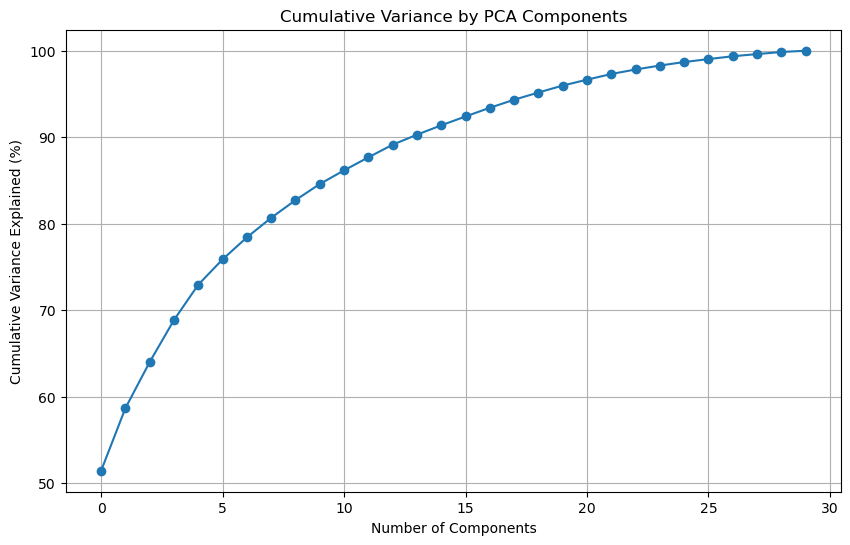

In [21]:
# PCA
pca = PCA()
pca.fit(returns)
explained_variance_ratio = pca.explained_variance_ratio_
pca_components = pca.components_

plt.figure(figsize=(10,6))
plt.plot(np.cumsum(explained_variance_ratio)*100, marker='o')
plt.title('Cumulative Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance Explained (%)')
plt.grid(True)
plt.show()

The PCA results is showing that just a few principal components explains most of the variation in returns across XLRE’s 30 holdings. **The first 5 components already capture around 74% of the variance, and by the tenth, nearly 97%** is explained, meaning the majority of risk is driven by common underlying factors rather than individual stock-specific noise. We think that this means that XLRE’s holdings move together because they are exposed to broad sector-wide movers like interest rates, real estate demand, and macroeconomic trends, this sugest that diversification within XLRE is limited, adding more REITs inside the fund does not eliminate much risk because they share the same dominant factors, wnad we suggest managing exposure to those few systemic components is more important than stock-picking within the ETF.

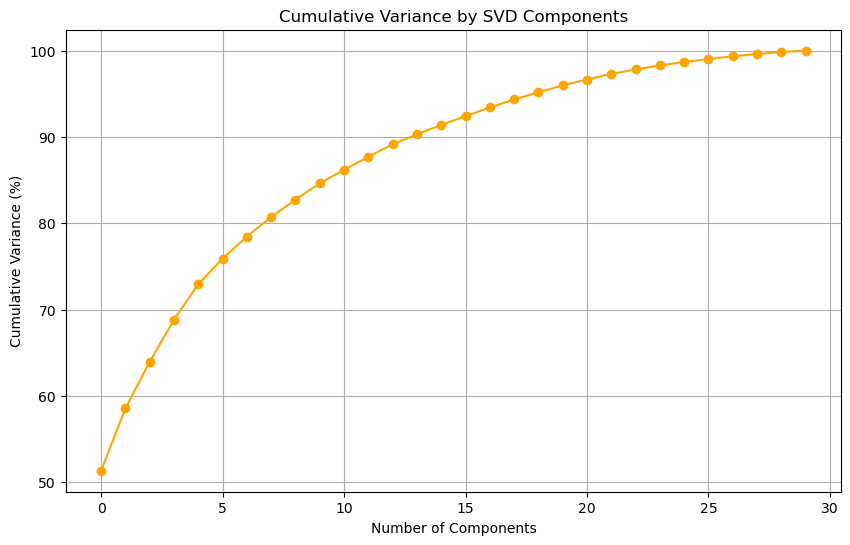

In [62]:
# SVD
U, S, VT = np.linalg.svd(returns.values, full_matrices=False)
svd_variance_ratio = (S**2) / (S**2).sum()

plt.figure(figsize=(10,6))
plt.plot(np.cumsum(svd_variance_ratio)*100, marker='o', color='orange')
plt.title('Cumulative Variance by SVD Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance (%)')
plt.grid(True)
plt.show()

The SVD results show that the variation in XLRE’s 30 holdings can be largely explained by a multiple factors. The first singular component alone accounts for about **58%** of the total variance, which signifies a dominant common market mover across the sector. By the **fifth component**, the cumulative variance explained rises to roughly **75%**, while the first **10–12 components** capture about **87%** of the variation in returns. Beyond this point, each additional component adds only marginal explanatory power, with **20+ components** together explaining close to ***100%***, much of which reflects firm-specific noise. This tells us that the majority of systematic risk in the REIT ETF is concentrated in a relatively small number of underlying market movers.